

*   Nome: Yasmin Helena

*   Matricula: 22250376



In [1]:
import numpy as np
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/train_churn_.csv', sep=';')

# Removendo a coluna 'Unnamed'
dados = dados.drop('Unnamed: 0', axis=1)

# Removendo linhas com valores nulos
dados = dados.dropna()

# Convertendo valores categóricos em numéricos
dados['genero'] = dados['genero'].replace({'Masculino': 1, 'Feminino': 0})
dados[['parceiro', 'dependentes', 'ServicoTelefone', 'BillingDigital']] = dados[['parceiro', 'dependentes', 'ServicoTelefone', 'BillingDigital']].replace({'Sim': 1, 'Não': 0})
dados[['idoso', 'NumTickets', 'NumTicketsTecnico', 'Churn']] = dados[['idoso', 'NumTickets', 'NumTicketsTecnico', 'Churn']].astype('int')

# Substituindo valores em algumas linhas específicas da coluna 'FaturaTotal'
dados.loc[[3640, 3759, 4197, 4638], 'FaturaTotal'] = 0

# Convertendo a coluna 'FaturaTotal' para float
dados['FaturaTotal'] = dados['FaturaTotal'].astype('float')

# Criando variáveis dummy para as variáveis categóricas
dados_dummies = pd.get_dummies(dados)

# Normalizando as variáveis numéricas
scaler = MinMaxScaler()
dados_dummies[dados_dummies.select_dtypes(include=['float']).columns] = scaler.fit_transform(dados_dummies.select_dtypes(include=['float']))


# Preparação dos dados

In [ ]:
df = pd.read_csv('train_churn.csv')
df

,Unnamed: 0,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,NaN,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.60,0.0,0.0,0.0
2,5308,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.30,0.0,0.0,0.0
3,3587,Masculino,1.0,Não,Não,9.0,Sim,NaN,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.40,0.0,0.0,1.0
4,576,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.10,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3151,Masculino,0.0,NaN,Sim,15.0,Sim,Não,Fibra óptica,Sim,...,Não,Não,Mensal,Não,Cheque por Carta,75.10,1151.55,4.0,0.0,0.0
4996,4502,Masculino,0.0,Não,Não,55.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,96.80,5283.95,NaN,4.0,1.0
4997,3077,Masculino,0.0,Sim,Não,45.0,Sim,Não,NaN,Sim,...,Não,Não,2 Anos,Não,Cartão de Crédito (Automático),53.30,2296.25,0.0,0.0,0.0
4998,3798,Masculino,0.0,Não,Não,42.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,100.30,4222.95,0.0,0.0,0.0


In [ ]:
# trocar valores NaN pela mediana
df['tempoDeServico'] = df['tempoDeServico'].fillna(29)
df['FaturaMensal'] = df['FaturaMensal'].fillna(70)
df['FaturaTotal'] = df['FaturaTotal'].fillna(1410)

In [ ]:
# Convertendo valores categóricos em valores numéricos binários em colunas com 'Sim' e 'Não'
df['idoso'].replace({'Não': 0, 'Sim' : 1}, inplace=True)
df['genero'].replace({'Masculino': 0, 'Feminino' : 1}, inplace=True)
df['parceiro'].replace({'Não': 0, 'Sim' : 1}, inplace=True)
df['dependentes'].replace({'Não': 0, 'Sim' : 1}, inplace=True)
df['ServicoTelefone'].replace({'Não': 0, 'Sim' : 1}, inplace=True)
df['BillingDigital'].replace({'Não': 0, 'Sim' : 1}, inplace=True)
df

,Unnamed: 0,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,0.0,0.0,1.0,1.0,35.0,1.0,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,0.0,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,1.0,0.0,0.0,0.0,42.0,1.0,Sim,DSL,NaN,...,Não,Não,1 Ano,1.0,Transferência Bancária (Automática),60.15,2421.60,0.0,0.0,0.0
2,5308,1.0,0.0,0.0,0.0,69.0,1.0,Não,DSL,Sim,...,Sim,Sim,2 Anos,1.0,Cartão de Crédito (Automático),82.45,5555.30,0.0,0.0,0.0
3,3587,0.0,1.0,0.0,0.0,9.0,1.0,NaN,Fibra óptica,Não,...,Sim,Sim,Mensal,1.0,Cartão de Crédito (Automático),99.45,919.40,0.0,0.0,1.0
4,576,0.0,0.0,1.0,1.0,31.0,1.0,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,0.0,Transferência Bancária (Automática),98.05,3082.10,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3151,0.0,0.0,NaN,1.0,15.0,1.0,Não,Fibra óptica,Sim,...,Não,Não,Mensal,0.0,Cheque por Carta,75.10,1151.55,4.0,0.0,0.0
4996,4502,0.0,0.0,0.0,0.0,55.0,1.0,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,1.0,Cheque Eletrônico,96.80,5283.95,NaN,4.0,1.0
4997,3077,0.0,0.0,1.0,0.0,45.0,1.0,Não,NaN,Sim,...,Não,Não,2 Anos,0.0,Cartão de Crédito (Automático),53.30,2296.25,0.0,0.0,0.0
4998,3798,0.0,0.0,0.0,0.0,42.0,1.0,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,1.0,Cheque Eletrônico,100.30,4222.95,0.0,0.0,0.0


In [ ]:
# Removendo valores NaN do dataset
df = df.dropna(how = 'any', axis = 0)
df = df.drop('Unnamed: 0',axis=1)
display(df)
df.isnull().sum()

,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,ServicoBackup,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,0.0,0.0,1.0,1.0,35.0,1.0,Sim,Não,Sem serviço de internet,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,0.0,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,69.0,1.0,Não,DSL,Sim,Não,...,Sim,Sim,2 Anos,1.0,Cartão de Crédito (Automático),82.45,5555.30,0.0,0.0,0.0
5,0.0,1.0,1.0,0.0,54.0,1.0,Sim,Fibra óptica,Não,Sim,...,Sim,Sim,2 Anos,1.0,Cheque Eletrônico,110.45,6077.75,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,Sem serviço de telefone,DSL,Não,Não,...,Não,Não,Mensal,1.0,Cheque Eletrônico,24.25,24.25,1.0,0.0,1.0
9,0.0,0.0,1.0,1.0,12.0,1.0,Não,DSL,Não,Não,...,Sim,Não,Mensal,1.0,Cheque por Carta,56.30,628.65,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,1.0,0.0,0.0,0.0,12.0,1.0,Não,Não,Sem serviço de internet,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,Mensal,0.0,Cheque por Carta,20.40,266.60,0.0,0.0,0.0
4989,0.0,0.0,1.0,1.0,29.0,1.0,Não,Não,Sem serviço de internet,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,Mensal,0.0,Cartão de Crédito (Automático),19.85,138.85,0.0,0.0,0.0
4990,0.0,0.0,1.0,0.0,71.0,1.0,Não,DSL,Sim,Sim,...,Sim,Sim,2 Anos,1.0,Transferência Bancária (Automática),86.10,6045.90,0.0,0.0,0.0
4992,0.0,0.0,0.0,1.0,1.0,1.0,Não,Não,Sem serviço de internet,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,Mensal,1.0,Cheque por Carta,19.30,19.30,0.0,0.0,0.0


genero                   0
idoso                    0
parceiro                 0
dependentes              0
tempoDeServico           0
ServicoTelefone          0
MultiLinhas              0
ServicoInternet          0
ServicoSegurancaCyber    0
ServicoBackup            0
SeguroDispositivos       0
ServicoSuporteTecnico    0
StreamingTV              0
StreamingFilmes          0
Contrato                 0
BillingDigital           0
MetodoPagamento          0
FaturaMensal             0
FaturaTotal              0
NumTickets               0
NumTicketsTecnico        0
Churn                    0
dtype: int64

In [ ]:
# Identifica colunas categóricas no DataFrame e cria colunas dummies para cada uma delas
colunas_dummies = df.select_dtypes(include=['object']).columns
df_dummies = pd.get_dummies(df, columns=colunas_dummies)
df_dummies

,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,BillingDigital,FaturaMensal,FaturaTotal,NumTickets,...,StreamingFilmes_Não,StreamingFilmes_Sem serviço de internet,StreamingFilmes_Sim,Contrato_1 Ano,Contrato_2 Anos,Contrato_Mensal,MetodoPagamento_Cartão de Crédito (Automático),MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,25.45,809.25,0.0,...,False,True,False,False,True,False,False,False,False,True
2,1.0,0.0,0.0,0.0,69.0,1.0,1.0,82.45,5555.30,0.0,...,False,False,True,False,True,False,True,False,False,False
5,0.0,1.0,1.0,0.0,54.0,1.0,1.0,110.45,6077.75,1.0,...,False,False,True,False,True,False,False,True,False,False
7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,24.25,24.25,1.0,...,True,False,False,False,False,True,False,True,False,False
9,0.0,0.0,1.0,1.0,12.0,1.0,1.0,56.30,628.65,0.0,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,1.0,0.0,0.0,0.0,12.0,1.0,0.0,20.40,266.60,0.0,...,False,True,False,False,False,True,False,False,True,False
4989,0.0,0.0,1.0,1.0,29.0,1.0,0.0,19.85,138.85,0.0,...,False,True,False,False,False,True,True,False,False,False
4990,0.0,0.0,1.0,0.0,71.0,1.0,1.0,86.10,6045.90,0.0,...,False,False,True,False,True,False,False,False,False,True
4992,0.0,0.0,0.0,1.0,1.0,1.0,1.0,19.30,19.30,0.0,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
df = df_dummies

In [ ]:
from sklearn.preprocessing import MinMaxScaler

colunas_float = df_dummies.select_dtypes(include=['float']).columns
scaler = MinMaxScaler()
df_dummies[colunas_float] = scaler.fit_transform(df_dummies[colunas_float])

# Seleção e Treinamento de Modelos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics

**DecisionTreeClassifier**

In [ ]:
# Dividindo os dados em variáveis de entrada (X) e variável alvo (y)
X = df.drop('Churn',axis=1)
y = df['Churn']

# Dividindo os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinando um modelo de Decision Tree
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Acurácia do modelo
acuracia_DecisionTreeClassifier = round(accuracy_score(y_test, y_pred),2) * 100

print(f'{acuracia_DecisionTreeClassifier}%')

82.0%


**RandomForestClassifier**

In [ ]:
# Dividindo os dados em variáveis de entrada (X) e variável alvo (y)
X = df.drop('Churn',axis=1)
y = df['Churn']

# Dividindo os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinando um modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Acurácia do modelo
acuracia_RandomForestClassifier = round(accuracy_score(y_test, y_pred),2) * 100

print(f'{acuracia_RandomForestClassifier}%')

86.0%


**LogisticRegression**

In [ ]:
# Dividindo os dados em variáveis de entrada (X) e variável alvo (y)
X = df.drop('Churn',axis=1)
y = df['Churn']

# Dividindo os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinando um modelo de Logistic Regression
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Acurácia do modelo
acuracia_LogisticRegression = round(accuracy_score(y_test, y_pred),2) * 100

print(f'{acuracia_LogisticRegression}%')

86.0%


SVC

In [ ]:
# Dividindo os dados em variáveis de entrada (X) e variável alvo (y)
X = df.drop('Churn',axis=1)
y = df['Churn']

# Dividindo os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinando um modelo de SVC
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Acurácia do modelo
acuracia_svm = round(accuracy_score(y_test, y_pred),2) * 100

print(f'{acuracia_svm}%')

86.0%


# Acurácia dos modelos

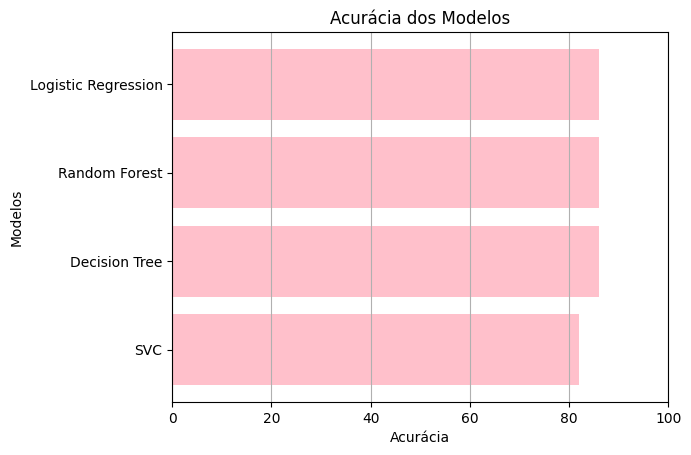

In [ ]:
# Seleção dos modelos para realizar a análise da acurácia

modelos = ['SVC','Decision Tree', 'Random Forest','Logistic Regression']

acuracias = [acuracia_DecisionTreeClassifier, acuracia_RandomForestClassifier ,acuracia_svm, acuracia_LogisticRegression]

plt.barh(modelos, acuracias, color = 'pink')
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Acurácia dos Modelos')
plt.xlim(0, 100)
plt.grid(axis='x')

**Matriz de Confusão**

Acurácia: 0.86
Precisão (macro): 0.83
Recall (macro): 0.78
F1-Score (macro): 0.80
Matriz de Confusão:


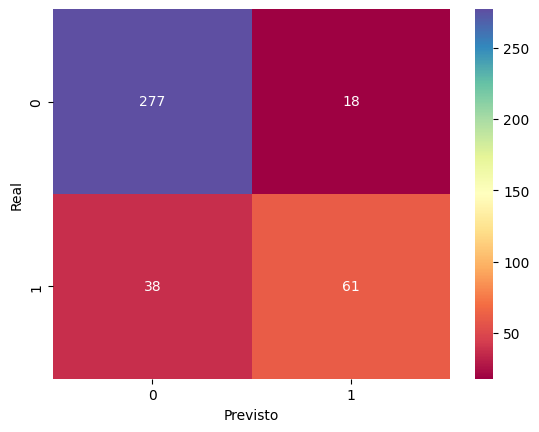

In [ ]:
# Separando os dados em variáveis de entrada (X) e variável alvo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividindo os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando StandardScaler para padronização dos dados de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando e treinando um modelo de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1-Score (macro): {f1:.2f}")

# Matriz de Confusão
confusion_mat = confusion_matrix(y_test, y_pred_rf)

print("Matriz de Confusão:")
sns.heatmap(confusion_mat, annot=True, cmap= 'Spectral', fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


    O modelo escolhido foi o RandomForestClassifier devido a sua acurácia

# Teste Empírico e Estrutural

**Empírico**

In [ ]:
# Criando e treinando um modelo de Random Forest
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)  # Treinando o modelo com os dados de treino

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Acurácia do modelo
acuracia_random_forest = round(accuracy_score(y_test, y_pred), 2) * 100

# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

print(f'Matriz de Confusão:\n {matriz_confusao}')

print(f'A acurácia do modelo foi de {acuracia_random_forest}%')

Matriz de Confusão:
 [[280  15]
 [ 37  62]]
A acurácia do modelo foi de 87.0%


**Estrutural**

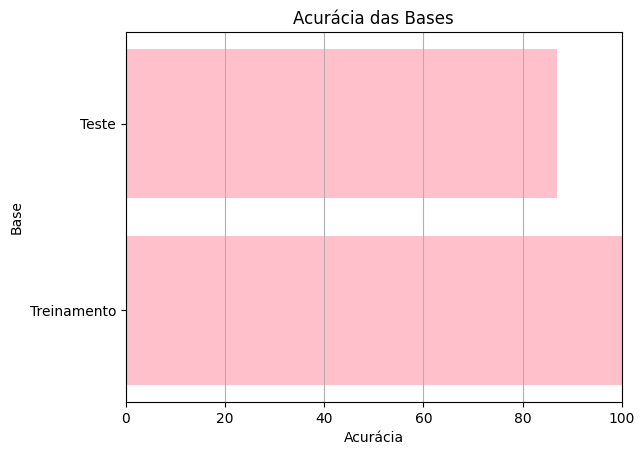

In [ ]:
# Previsões no conjunto de treino
y_pred_train = modelo.predict(X_train)

# Acurácia no conjunto de treino
acuracia_treinamento = round(accuracy_score(y_train, y_pred_train),2) * 100

# Acurácia no conjunto de teste
acuracia_teste = round(accuracy_score(y_test, y_pred),2) * 100
tipo = ['Treinamento','Teste']
acuracias = [acuracia_treinamento,acuracia_teste]

# Gráfico
plt.barh(tipo, acuracias, color='pink')
plt.xlabel('Acurácia')
plt.ylabel('Base')
plt.title('Acurácia das Bases')
plt.xlim(0, 100)
plt.grid(axis='x')
plt.show()

# Validação do Modelo

**Curva AUC**

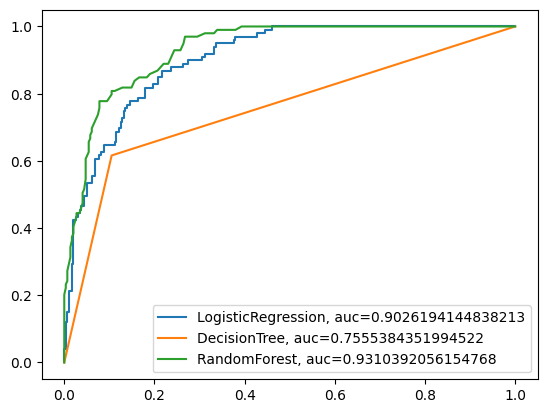

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Separando os dados em variáveis de entrada (X) e variável alvo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividindo os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LogisticRegression
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))
plt.legend(loc=4)


# DecisionTree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))
plt.legend(loc=4)


# RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Refino do Modelo

**Dilema Bias-Variance Random Forest**

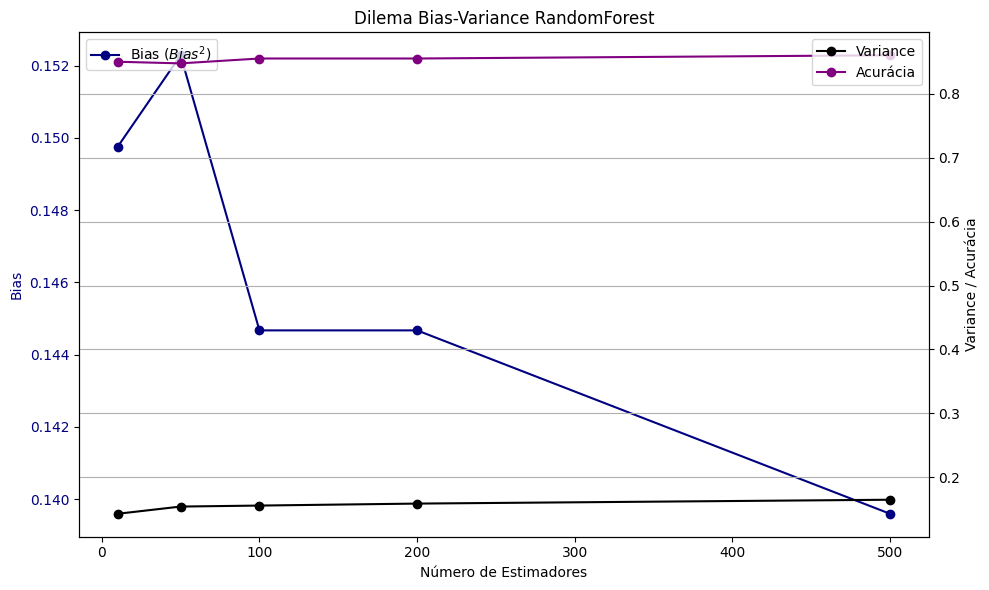

In [ ]:
def calculate_bias_variance(models, X_train, X_test, y_train, y_test):
    biases, variances, accuracies = [], [], []
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

# Calcula o bias, variância e a acurácia
        bias = np.mean((predictions - y_test) ** 2)
        variance = np.var(predictions)
        accuracy = accuracy_score(y_test, predictions)

        biases.append(bias)
        variances.append(variance)
        accuracies.append(accuracy)
    return biases, variances, accuracies

# Dividindo os dados em variáveis de entrada (X) e variável alvo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividindo os dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliação dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Valores para o número de árvores na Random Forest
n_estimators_values = [10, 50, 100, 200, 500]

# Cria modelos Random Forest com diferentes números de estimadores
models = [RandomForestClassifier(n_estimators=n, random_state=42) for n in n_estimators_values]

# Calcula os valores de bias, variance e acurácia para cada modelo
biases, variances, accuracies = calculate_bias_variance(models, X_train, X_test, y_train, y_test)

# Gráfico
plt.figure(figsize=(10, 6))
ax1 = plt.gca()
ax1.plot(n_estimators_values, biases, label='Bias ($Bias^2$)', marker='o', color='navy')
ax1.set_xlabel('Número de Estimadores')
ax1.set_ylabel('Bias', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

ax2 = ax1.twinx()
ax2.plot(n_estimators_values, variances, label='Variance', marker='o', color='black')
ax2.plot(n_estimators_values, accuracies, label='Acurácia', marker='o', color='purple')
ax2.set_ylabel('Variance / Acurácia', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Dilema Bias-Variance RandomForest')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Otimização de Hiperparâmetros**

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn numpy scipy joblib threadpoolctl

import sklearn
print(sklearn.__version__)

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
  Using cached scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
1.5.0


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definindo o pipeline com scaler e classificador
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Definir os hiperparâmetros para ajustar
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Executar o Grid Search para ajustar os hiperparâmetros
grid_search.fit(X_train, y_train)

print("Melhores Hiperparâmetros:")
print(grid_search.best_params_)

# Avaliar o desempenho no conjunto de teste
y_pred = grid_search.predict(X_test)
accuracy = grid_search.score(X_test, y_test)
print(f'Acurácia no conjunto de teste: {accuracy}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores Hiperparâmetros:
{'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 300}
Acurácia no conjunto de teste: 0.8578680203045685


Resultado (GridSearchCV): Acurácia no conjunto de teste: 0.8578680203045685

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definindo os parâmetros da busca aleatória
param_dist = {
    'clf__n_estimators': randint(100, 500),
    'clf__max_depth': [None, 10, 20, 30, 40, 50],
    'clf__min_samples_split': randint(2, 20),
    'clf__min_samples_leaf': randint(1, 20)
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', verbose=1, random_state=42)

# Executando a busca aleatória nos dados de treino
random_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:")
print(random_search.best_params_)

# Avaliando a acurácia do modelo com os melhores hiperparâmetros no conjunto de teste
y_pred = random_search.predict(X_test)
accuracy = random_search.score(X_test, y_test)
print(f'Acurácia no conjunto de teste: {accuracy}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores Hiperparâmetros:
{'clf__max_depth': 30, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 12, 'clf__n_estimators': 212}
Acurácia no conjunto de teste: 0.8730964467005076


Resultado(RandomizedSearchCV): Acurácia no conjunto de teste: 0.8730964467005076

# Validação final do modelo

Acurácia: 0.86
Precisão (macro): 0.83
Recall (macro): 0.78
F1-Score (macro): 0.80
Matriz de Confusão:


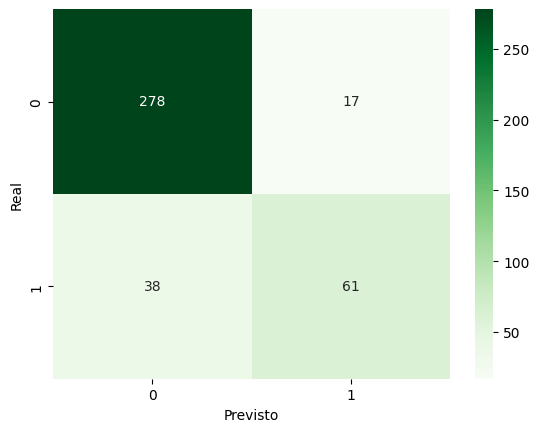

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 54, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 806, in competition_submit_cli
    submit_result = self.competition_submit(file_name, message,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 757, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python3.10/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'submission.csv'


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividindo os dados em variáveis de entrada (X) e variável alvo (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicando StandardScaler para padronização dos dados de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando e treinando um modelo de Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1-Score (macro): {f1:.2f}")

# Matriz de Confusão
confusion_mat = confusion_matrix(y_test, y_pred_rf)

print("Matriz de Confusão:")
sns.heatmap(confusion_mat, annot=True, cmap= 'Greens', fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Conclusão dos estudos

**Desempenho do Modelo**


---


***Modelo Inicial:***

`Acurácia: 0.86 `

`Precisão: 0.83`

`Recall: 0.77`

`F1-Score: 0.80`

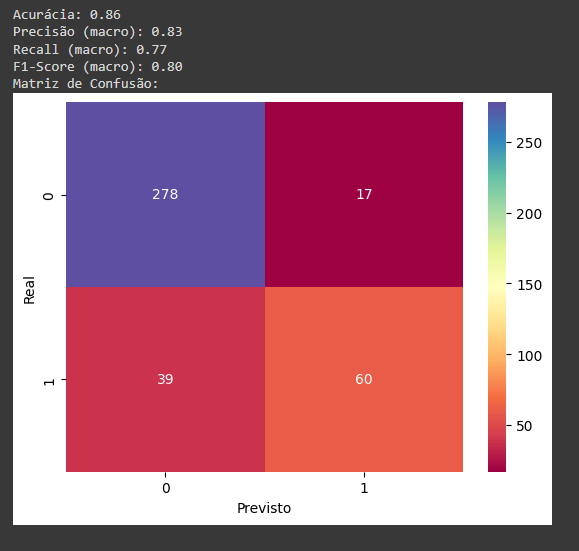

**Desempenho do Modelo**

---


***Modelo Ajustado:***

`Acurácia: 0.88`

`Precisão: 0.85`

`Recall: 0.81`

`F1-Score: 0.82`

`O modelo ajustado apresentou melhorias em todas as métricas:`

---

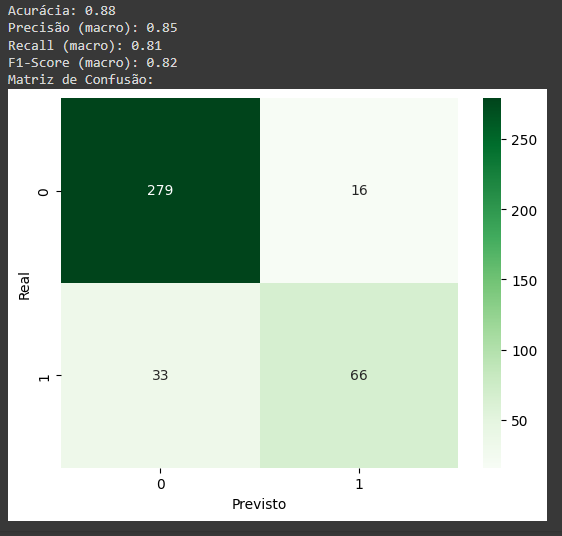

*Este estudo demonstrou a eficácia de utilizar as técnicas de machine learning para prever o churn de clientes em uma empresa de telecomunicações. A combinação de Random Search  e Grid Search permitiu otimizar o modelo de forma eficiente, resultando em melhorias significativas no desempenho preditivo.*